### Energy Balance Climate Model (Budyko 1969)

- Apr 2023 GR6926 Spring 2023 (McKinley & Pincus)
- Mar 24 2021 GR6926 Spring 2021 (McKinley & Fiore)
- Nov 13 2019 GR6926 Fall 2019 (McKinley & Fiore)
- Adapted from matlab, EESC G9910 Simple Models Seminar Fall 2016 (Mike Previdi)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [31]:
#Note that Budyko equation is written for temperature in celsius
#Note also that Budyko's original paper has radiation in units of kcal/cm2 each month ; we use W/m2

class budyko():
    """ energy balance climate model (Budyko style)"""
    
    def __init__(self, Q0=1336., alpha1=0.3, alpha2=0.6, alpha_s=None, s2=-0.482,T_s=-10., A=211.1, B=1.55, C=3.74):
        """ constructor
        
        PARAMETERS:
        Q0: float
            incoming solar radiation (Solar constant) units are W/m2
        alpha_s: float
            albedo at ice line, taken to be average of alpha1 and alpha2     
        alpha1: float
            albedo in non-ice covered state
        alpha2: float
            albedo in ice-covered state
        s2: float
             coefficient for second order Legendre polynomial
        T_s: float
            critical temperature below which ice advances and shifts to alpha2 albedo
        A: float
            Value taken from Lindzen & Farrell (1977); see Baker & Roe 2010  W/m2
        B: float
            Value taken from Lindzen & Farrell (1977); see Baker & Roe 2010  W/m2/C
            A+BT is the linear relationship between OLR and T; B reflects climate sensitivity
        C: float
            Value also taken from Lindzen & Farrell (1977). This term governs meridional redistribution of heat
            Units are W/m2/C; C(T(x)-Tavg); redistribution depends on difference of local T to global mean       
       """
        self.Q0 = Q0
        self.alpha1 = alpha1
        self.alpha2 = alpha2
        if alpha_s is None:
            self.alpha_s = 0.5*(alpha1+alpha2)
        else: 
            self.alpha_s = alpha_s
        self.s2  = s2
        self.T_s = T_s
        self.A = A
        self.B = B
        self.C = C
        
        return None   

    def k(self): 
        """ 
        calculate the constant needed to solve for xs (sin ice line latitude) as a function of Q
        """
        # constant (see Roe & Baker 2010 Equation )
        return(self.A+(self.B*self.T_s)+(self.C*self.T_s)+((self.C*self.A)/self.B)) 
    
    def get_roots(self):
        '''
        Find the roots of the characteristic polynomial;
        second two solutions are positions of the ice line 
        
        Returns values of x = sin(lat)
        '''
        # Find roots: r1 is the coefficient for x^3; r2 for x^2; r1 for x, and r4 incorporates all constants
        r1 = -self.Q0*self.C*(self.alpha1-self.alpha2)*self.s2*(1/(8*self.B))
        r2 = ((3*self.Q0*self.s2)/8)*(1-self.alpha_s)
        r3 = ((self.Q0*self.C*(self.alpha1-self.alpha2))/(8*self.B))*(self.s2-2)
        r4 = (self.Q0/4)-((self.Q0*self.s2)/8)-((self.Q0*self.alpha_s)/4)+((self.Q0*self.alpha_s*self.s2)/8)+((self.Q0*self.C)/(4*self.B))-((self.Q0*self.C*self.alpha2)/(4*self.B))-self.k()
        return(np.roots(np.poly1d([r1,r2,r3,r4])))

    def Q(self, x=None):
        """ 
        Compute solar insolation for each equillibrium ice-line sin(lat)
        """
        #Solve EBCM for Q as a function of x (sin(ice-line lattiude)
        if x is None:
            x_vals = np.linspace(0.,1.,num=1000)
        else:
            x_vals = x
            
        Q=self.k()/(((-self.C*(self.alpha1-self.alpha2)*self.s2*x_vals**3)/(8*self.B)) + \
                    (((3*self.s2/8)*(1-self.alpha_s)*x_vals**2) + \
                    (((self.C*(self.alpha1-self.alpha2))/(8*self.B))*(self.s2-2)*x_vals) + \
                    (1/4)-(self.s2/8)-(self.alpha_s/4)+(self.alpha_s*self.s2)/8) + \
                    (self.C/(4*self.B))-((self.C*self.alpha2)/(4*self.B)))
        return(x_vals, Q)

    def find_gsp(self, x=None):
        '''
        Find the global stability point (ice line latitude)
        
        Returns values of x = sin(lat)
        '''
        # identify where Q(x) is minimum, where x = sin ice latitude
        x_vals, Q = self.Q(x)
        return(x_vals[Q.argmin()])

#Fill in here for calculation of global temperature for iceline at any x "input_x"  and Qratio "input_Qrat"  
    def get_globalT(self,input_x,input_Qrat):
        # solve for global T based on solution for x
        ## STUDENTS TO FILL THIS IN
        #alpha_p = 
        #globalT = 
        ## STUDENTS TO FILL THIS IN
        return(globalT)

In [ ]:
def plot_T(ecbm):
    self.globalT = ebcm.get_globalT(input_x=self.x,input_Qrat=self.Qrat)
    for x, xlab, y, ylab in zip([self.globalT, self.Qrat], 
                                ['global mean T (C)', 'Q/Q0'], 
                                [self.x, self.globalT], 
                                ['sine of ice-line latitude', 'global mean T (C)']):
        """ plotting T vs sin lat """
        plt.figure(figsize=[10,8])
        plt.plot(x, u, color='black')
        plt.xlabel(xlab,fontsize=16)
        plt.ylabel(ylab, fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.title('Budyko EBCM Solution, Global Temperature, with variation in Qratio', fontsize=16) 
        plt.grid(which = 'major')      


In [14]:
def plot_Qofx(ecbm, x=None, plot_lat=False):
    """ 
    Plot Q of x for a 1D en energy balance climate model  
    """
    x_vals, Q = ecbm.Q()
    Qrat = Q/ecbm.Q0

    plt.figure(figsize=[10,8])
    if plot_lat:
        y = np.rad2deg(np.arcsin(x_vals)) 
        ylim = [0,90]
        ylab = 'ice-line latitude /deg'
    else:
        y = x_vals
        ylim = [0, 1]
        ylab = 'sine of ice-line latitude'
    plt.plot(Qrat, y, color='black')
    plt.xlim([0.9,1.3])
    plt.ylim(ylim)
    plt.xlabel('Q/Q0',fontsize=16)
    plt.ylabel(ylab, fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title('Budyko EBCM Solution', fontsize=16)  
    plt.grid(which = 'major')
    return None 

In [33]:
ebcm=budyko()

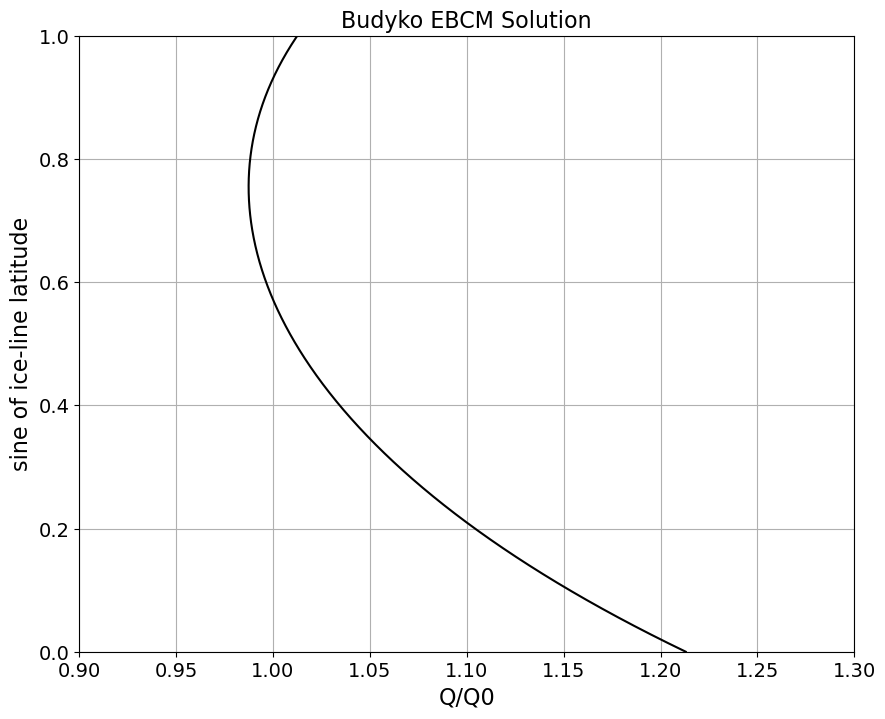

In [16]:
plot_Qofx(ebcm)

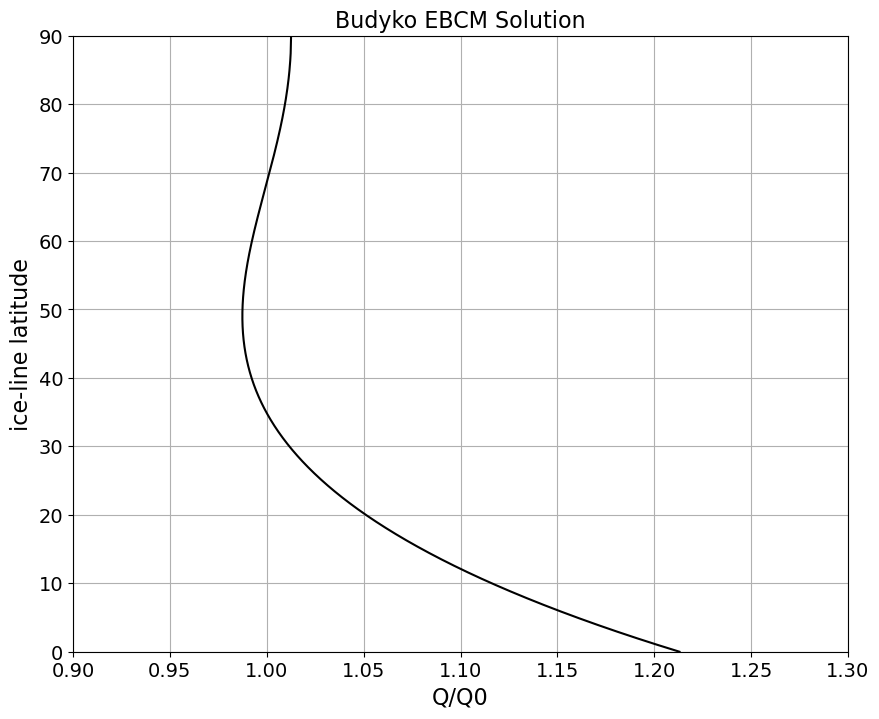

In [17]:
plot_Qofx(ebcm, plot_lat=True)

In [40]:
roots = ebcm.get_roots()
print("Roots (degrees): ", np.degrees(np.arcsin(roots[1:])))

Roots (degrees):  [68.54534408 34.86292641]


In [36]:
gsp = ebcm.find_gsp()
print("Global stability point sin(lat):", gsp, ", in degrees: ", np.degrees(np.arcsin(gsp)))

Global stability point sin(lat): 0.7547547547547547 , in degrees:  49.00394539581304


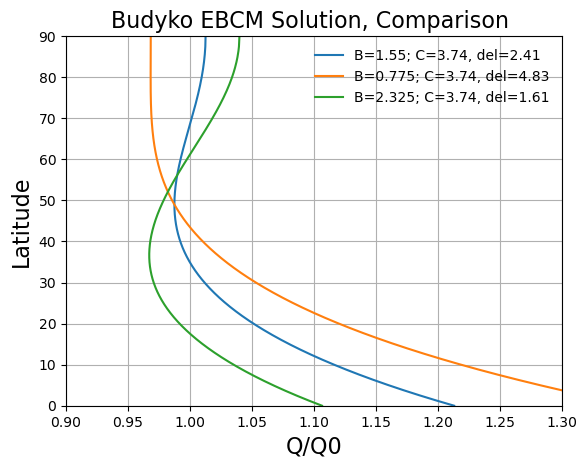

In [57]:
#
# Example = vary values of B 
#
for B in [1.55, .5 * 1.55, 1.5 * 1.55]: 
    ebcm = budyko(B = B)
    x, Q = ebcm.Q()
    plt.plot(Q/ebcm.Q0, np.degrees(np.arcsin(x)), 
             label=f'B={ebcm.B}; C={ebcm.C}, del={round(ebcm.C/ebcm.B,2)}')
    
plt.legend(frameon=False)
plt.xlim([0.9,1.3])
plt.ylim([0,90])
plt.xlabel('Q/Q0',fontsize=16)
plt.ylabel('Latitude /deg', fontsize=16)
plt.title('Budyko EBCM Solution, Comparison ', fontsize=16) 
plt.grid(which = 'major')

In [11]:
# Rerun default, for consideration of Global Mean T
#x,Q,Qrat,Q0=ebcm.get_qofx()
#iceline,j =ebcm.get_roots()
#x_gsp,x_gsp_deg=ebcm.find_gsp()

In [12]:
# Need to fill in Qrat here
#T_gsp = ebcm.get_globalT(input_x = x_gsp, input_Qrat = )
#print(T_gsp)
#Ticeline = ebcm.get_globalT(input_x = iceline[1],input_Qrat = )
#print(Ticeline)